# Άσκηση στην κβαντική πληροφορία

## 1. Λύση της Lane-Emden

In [1]:
import numpy as np
import matplotlib.pylab as plt
from rk4Algor2 import rk4Algor2
from simpson import simps

Έχουμε τη διαφορική:
$$\frac{1}{ξ^2}\frac{d}{dξ}ξ^2\frac{dθ}{dξ}+θ^{1/(γ-1)}=0$$
και χρησιμοποιούμε Rungke Kutta 4ης τάξης για τη λύση της.

In [2]:
gamma=np.linspace(1.2,1.8,50) 
N=len(gamma)
step=0.01
xend=20
y=np.zeros(2) #πίνακας με τις αρχικές συνθήκες θ, dθ/dξ

C:\Users\F6D1~1\AppData\Local\Temp/ipykernel_7300/3711751816.py:4: RuntimeWarning: invalid value encountered in double_scalars
  rhs[1]=-(2/ksi)*y[1]-y[0]**(1/(gamma[g]-1))


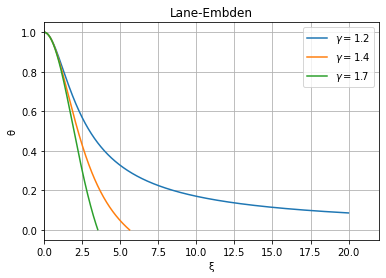

In [3]:
def f(ksi,y,g): #Η διαφορική που θέλουμε να λύσουμε
    rhs=np.zeros(2) 
    rhs[0]=y[1]
    rhs[1]=-(2/ksi)*y[1]-y[0]**(1/(gamma[g]-1))
    return rhs

thetaall={}
ksiall={}
ksith=np.zeros(int((xend/step -1)),float)
for g in range(0,N): #ολοκλήρωση για κάθε γ
    y[0]=1
    y[1]=0
    i = -1
    theta = []
    ksith =[]
    for ksi in np.arange (0+step , xend , step):
        i=i+1
        ksith.append(ksi)
        y=rk4Algor2(ksi,step,2,y,f,g) #Runge kutta
        theta.append(y[0]) 
        if np.isnan(theta[i]) or theta[i]<0:
            theta.remove(theta[i])
            ksith.remove(ksith[i])
            break
        
    thetaall[g]=theta 
    ksiall[g]=ksith
plt.figure()
#plot για 3 τιμές του γ
plt.plot(ksiall[0],thetaall[0],label="$γ=%.1f$"%gamma[0])
plt.plot(ksiall[15],thetaall[15],label="$γ=%.1f$"%gamma[15])
plt.plot(ksiall[int(N-8)],thetaall[int(N-8)],label="$γ=%.1f$"%gamma[int(N-8)])
plt.legend(loc="best")
plt.xlim([0,xend+2])
plt.grid(True)
plt.ylabel('θ')
plt.xlabel('ξ')
plt.title('Lane-Embden')
plt.show()


## 2. Αναπαραγωγή του Figure 1

Έχουμε να λύσουμε την:
$$h(ak)=\bigg(\frac{4πρ_0α^3}{ak} \int_{0}^{ξ_R} θ^{1/(γ-1)}(ξ)sin(ak\cdot ξ)ξdξ\bigg)^2$$
Έτσι ώστε να την εκφράσουμε ως:
$$\tilde{f}(k)=\frac{h(ak)}{h(\frac{απ}{R})}=\frac{h(ak)}{h(\frac{π}{ξ_R})}=\frac{h(ak)}{C(γ)}$$
Στη συνέχεια λαμβάνω υπόψην τον συμβολισμό του βιβλίου, οπότε χρησιμοποιώ το k, και όχι το κ=αk

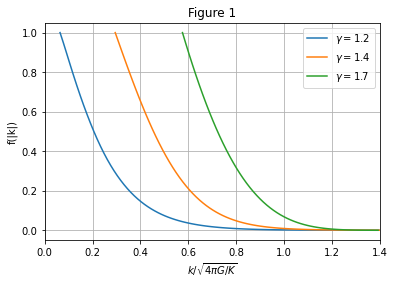

In [4]:
p0=1 #Σταθερές που τις θέτουμε 1 
G=1
Kg=1

def a(g): #Το γράφουμε ως συνάρτηση των σταθερών 
    return np.sqrt(Kg*gamma[g]/(4*np.pi*G*(gamma[g]-1))*p0**(gamma[g]-2))
def R(g): 
    return ksiall[g][len(thetaall[g])-1]*a(g)

def h_integr(i,g,k): #το μέγεθος που είναι να ολοκληρωθεί
    olokl=thetaall[g][i]**(1/(gamma[g]-1))*np.sin(a(g)*k*ksiall[g][i])*ksiall[g][i]
    return olokl

def h(k,g):
    final=(step/3)*(h_integr(0,g,k)+h_integr(len(thetaall[g])-1,g,k))
    for c in range(1,len(thetaall[g])-1):
        if c%2==0:
            final+=(step/3)*4*h_integr(c,g,k)
        elif c%2==1: 
            final+=(step/3)*2*h_integr(c,g,k) 
    final=(((4*np.pi*p0*a(g)**3)/(a(g)*k) )*final)**2
    return final


fkall=[]
kplotall=[] #k/sqrt(4πG)
kall=[]     
for g in range(0,len(gamma)): #για κάθε γ
    fk=[]
    kplot=[]
    kappa=[]
    counting=0
    for k in np.arange(np.pi/R(g),100,0.05): #μέχρι ένα kmax που αν η f=0 νωρίτερα τερματίζει
        counting+=1
        kappa.append(k)
        fk.append(h(k,g)/h(np.pi/R(g),g))
        kplot.append(k/np.sqrt(4*np.pi*G/Kg))
        if fk[counting-1]<10**(-5):
            break
    fkall.append(fk)
    kplotall.append(kplot)
    kall.append(kappa)
plt.figure()
plt.plot(kplotall[0],fkall[0],label="$γ=%.1f$"%gamma[0])
plt.plot(kplotall[15],fkall[15],label="$γ=%.1f$"%gamma[15])
plt.plot(kplotall[int(N-8)],fkall[int(N-8)],label="$γ=%.1f$"%gamma[int(N-8)])
plt.grid(True)
plt.title('Figure 1')
plt.ylabel('f(|k|)')
plt.xlabel('$k/ \sqrt{4πG/K}$')
plt.legend(loc="best")
plt.xlim([0,1.4])
plt.show()

## 3. Αναπαραγωγή του Figure 2

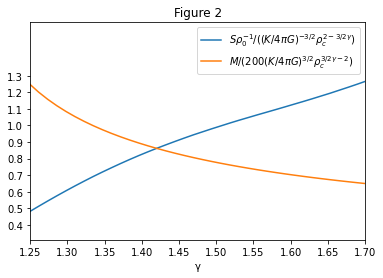

In [5]:
def simpsonS(f,xmin,xmax,hstep,g):
    final=(hstep/3)*(f(xmin,g)+f(xmax,g))
    count=0
    for c in np.arange(xmin+hstep,xmax,hstep):
        count+=1
        if count%2==0:
            final+=(hstep/3)*4*f(c,g)
        elif count%2==1: 
            final+=(hstep/3)*2*f(c,g) 
    return final

def S_integr(k,g): #το μέρος της εντροπίας που είναι προς ολοκλήρωση
    return ( h(k,g)/h(np.pi/R(g),g))*np.log(h(k,g)/h(np.pi/R(g),g))*k**2

def M_integr(i,g): #το μέρος της Μ που είναι προς ολοκλήρωση
    return thetaall[g][i]**(1/(gamma[g]-1))*ksiall[g][i]**2

def S(g): #εντροπία
    kmin=np.pi/R(g)
    return  (-4*np.pi)*simpsonS(S_integr,kall[g][0],40,0.05,g)

def M(g): #μάζα
    return 4*np.pi*p0*a(g)**3 *simps(M_integr,0,len(thetaall[g])-1,0.01,g)

pc=p0  #p κρίσιμη
Sg=[(S(t)*p0**(-1))/((Kg/(4*np.pi*G))**(-3/2)*pc**(2-(3/2)*gamma[t])) for t in range(len(gamma))]
Mg=[M(t)/(200*(Kg/(4*np.pi*G))**(3/2)*pc**(3/2*gamma[t]-2)) for t in range(len(gamma))]


l1=np.arange(1.25,1.75,0.05)
l2=np.arange(0.4,1.35,0.1)
plt.figure()
plt.plot(gamma,Sg,label='$Sρ_0^{-1}/((K/4πG)^{-3/2}ρ_c^{2-3/2γ})$')
plt.plot(gamma,Mg,label='$M/(200(K/4πG)^{3/2}ρ_c^{3/2γ-2})$')
plt.xlabel('γ')
plt.title('Figure 2')
plt.legend(loc="best")
plt.xlim([1.25,1.7])
plt.xticks(l1)
plt.yticks(l2)
plt.show()


## 3. Αναπαραγωγή του Figure 5

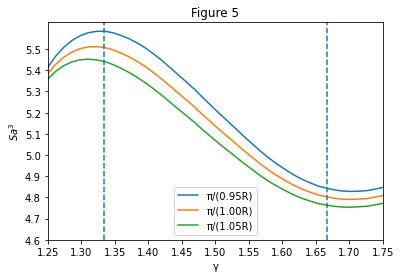

In [6]:
kminS=[0.95,1,1.05]
Sa=[0]*3
for i in range(3):
    def intSa(k,g):
        return ( h(k,g)/h(np.pi/(kminS[i]*R(g)),g))*np.log(h(k,g)/h(np.pi/(kminS[i]*R(g)),g))*k**2
    def Saaa(g):
        kmin=np.pi/(kminS[i]*R(g))
        return  (-4*np.pi*a(g)**3)*simpsonS(intSa,kmin,40,0.05,g)
    Sa[i]=[Saaa(t) for t in range(len(gamma))]

l1=np.arange(1.25,1.8,0.05)
l2=np.arange(4.6,5.6,0.1)
plt.figure()
plt.title('Figure 5')
plt.plot(gamma,Sa[0],label='π/(0.95R)')
plt.plot(gamma,Sa[1],label='π/(1.00R)')
plt.plot(gamma,Sa[2],label='π/(1.05R)')
plt.xlabel('γ')
plt.ylabel('$Sa^3$')
plt.axvline(x =4/3,ls='--')
plt.axvline(x=5/3,ls='--')
plt.xlim([1.25,1.7])
plt.xticks(l1)
plt.yticks(l2)
plt.legend(loc="best")
plt.show()